# Q1 Gillespie's Direct Algorithm and Stochastic Hallmarks

Investigate
1. Variability
2. Negative co-variances
3. Increased transients
4. Stochastic resonance
5. Extinctions

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit
from random import random

\begin{align}
\frac{dS}{dt} &= \mu -\beta SI - \mu S, \label{eq:dSdtDemo} \\
\frac{dI}{dt} &= \beta SI - \gamma I- I(\mu + \rho), \label{eq:dIdtDemo} \\
\frac{dR}{dt} &= \gamma I- \mu R. \label{eq:dRdtDemo}
\end{align}

In [2]:
def determinsteSIR(previousState, t, beta, gamma, birth_rate):
    N = np.sum(previousState)
    S,I,R = previousState/N
    state = np.empty(3)
    state[0] = birth_rate - S*birth_rate - S*I*beta
    state[1] = S*I*beta   - I*birth_rate - I*gamma 
    state[2] = I*gamma    - R*birth_rate
    return state
    

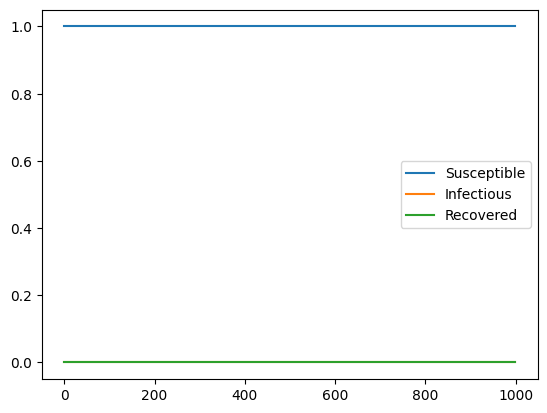

In [3]:
XYZ = [10000, 10, 0]
t = np.linspace(0,100,1000)
beta = 1/2
gamma = 1/2
mu = 1/60

solved = odeint(determinsteSIR, XYZ, t, (beta, gamma, mu))/10000
plt.plot(solved[:, 0], label = "Susceptible")
plt.plot(solved[:, 1], label = "Infectious")
plt.plot(solved[:, 2], label = "Recovered")
plt.legend(loc="best")

In [4]:
def stoch_sir(XYZ, N, tend, beta, gamma, mu):
    # Columns: SIR, Rows: Events [infect, recovery, birth, death S, death I, death R]
    change_matrix = np.array(
                            [[-1, 1, 0],
                             [0, -1, 1],
                             [1,  0, 0],
                             [-1, 0, 0],
                             [0, -1, 0],
                             [0,  0,-1]
                            ])
    current_t = 0
    ts = 0.1
    T = [0]
    S = [XYZ[0]]
    I = [XYZ[1]]
    R = [XYZ[2]]

    while T[current_t] < tend:
        T.append(T[-1] + ts)
        S.append(XYZ[0])
        I.append(XYZ[1])
        R.append(XYZ[2])

        update = np.zeros((6,3))
        event_rates = ([(beta * XYZ[0] * XYZ[1])/N, gamma * XYZ[1], 
                  mu * N,  mu * XYZ[0], mu * XYZ[1], mu * XYZ[2]])
         
        rand_1 = random()
        rand_2 = random()
        ts = -np.log(rand_1)/(np.sum(event_rates))

        p = rand_2 * np.sum(event_rates)
        event_index = min(np.nonzero(np.ravel(np.cumsum(event_rates) >= p))[0])
 
        XYZ = XYZ + change_matrix[event_index, :]
  
        current_t = current_t + 1
    return [T, S, I, R]
def run_simulations(number_of_runs, name, kwargs):
    for i in range(number_of_runs):
        df = pd.DataFrame(stoch_sir(**kwargs)).transpose()
        df.columns = ["T", "S", "I", "R"]
        df.to_csv(f"data/{name.capitalize()}stochasticSIR{i+1}.csv", index=False)
runs = 100
# Varying Beta
for beta in np.linspace(0,4, 20):
    XYZ = np.array((10000, 1, 0))
    run_simulations(runs, "beta",
                    {"XYZ": XYZ,
                     "N":np.sum(XYZ) ,
                     "tend":365,
                     "beta": beta,
                     "gamma":1/14,
                     "mu":1/200})
# Varying Gamma
for gamma in np.linspace(0,4, 20):
    XYZ = np.array((10000, 1, 0))
    run_simulations(runs, "gamma",
                    {"XYZ": XYZ,
                     "N":np.sum(XYZ) ,
                     "tend":365,
                     "beta": 1/2,
                     "gamma":gamma,
                     "mu":1/200})
# Varying Mu
for mu in np.linspace(0,0.1, 20):
    XYZ = np.array((10000, 1, 0))
    run_simulations(runs, "mu",
                    {"XYZ": XYZ,
                     "N":np.sum(XYZ) ,
                     "tend":365,
                     "beta": 1/2,
                     "gamma":1/14,
                     "mu":mu})
# Varying N
for N in range(0,7):
    XYZ = np.array((10**N, 1, 0))
    run_simulations(runs, "N",
                    {"XYZ": XYZ,
                     "N":np.sum(XYZ) ,
                     "tend":365,
                     "beta": 1/2,
                     "gamma":1/14,
                     "mu":1/200})

data_T = np.array(T)
data_S = np.array(S)/10000
data_I = np.array(I)/10000
data_R = np.array(R)/10000

plt.plot(data_T, data_S, data_T, data_I, data_T, data_R)
plt.xlabel("Days")
plt.ylabel("Population Fraction")
plt.legend(["Susceptible", "Infected", "Recovered"])
plt.show()


NameError: name 'T' is not defined

## Investigate Simultion variability and Negative Co-variance
!SOPH!
> Investigate how varying the model parameters changes the behavior of the stochatic dynamics. How do the related to the variance between runs and the negative covariance between $S$ and $I$.

> Compare the mean of the stochatic models to their deterministic counter parts

## Stochatic Resonance and Increase Transients
!AMIR!
> Show how the stochatic models can induce stochatic resonance around the equilibiruim and how that resonance relates to the paramters.

> Show some example of increased transients away from the deterministic equilibiruim. Which parameters lead to the largest transient?

## Extinction events and Critical Community Size  
- Population in exponential scale
- Hand pick gamma
- Hope for an elbom (inflexion point)
> Design an experiment that shows the effect of varying $R_0$ on the extinction process. *Keep in mind that int he closed system randomness will always eventually lead to extinction*. 

> Look at how the extinction events are impacted by the population size. Find a way to show how the two parameter $R_0$ and $N$ ineract to imact the extinction process.

# Network
